In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate
from tools import plot_confusion_matrix, get_best_model
from getSIDMdata_generator_meta import get_tf_DataSet as getGenerators
import scienceplots
plt.style.use(["science"])

Objectives
----------
1. To see if the model can tell between baryonic feedback and dark matter ineractions


Conclusions
-----------
1. Xray really deciphers between baryonic models and total and stellar dark matter models
2. Generators with an refelect and interpolation order of 3 do well
3. Xray means that we can descern between CDM, but because CDM and SIDM have the same AGN then it is difficult to separte those out.


In [6]:
def predict( test_set, list_of_models ):
    
    predictions = None
    for iL, iModel in enumerate(list_of_models):
        
        if predictions is None:
            predictions = np.argmax(iModel.predict( test_set, verbose=0 ), axis=-1)
        else:
            new_predict = np.argmax(iModel.predict( test_set, verbose=0 ), axis=-1)
            predictions[ predictions == iL ] += new_predict[ predictions == iL]
    return predictions

In [7]:
epochs=80
random_state=42
model_name='simple'

#### 1. Get the fiducial for total and stellar for CDM fiducial and DM (fiducial_model)

In [28]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar'], 
                                                      allDataFile='pickles/binned_data_20.pkl')
checkpoint_filepath = 'models/test_baryon/%s_cdmfid_0p1_1_tot_ste_%i' % (model_name, random_state)

num_classes = len(np.unique(test[1]))
fiducial_model = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)

Epoch 1/50


/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (2880, 100, 100, 2) (2 channels).
  warnings.warn(


90/90 [==============================] - ETA: 0s - loss: 0.9289 - accuracy: 0.5243

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 10s 102ms/step - loss: 0.9289 - accuracy: 0.5243 - val_loss: 0.8279 - val_accuracy: 0.5847
Epoch 2/50
90/90 [==============================] - ETA: 0s - loss: 0.7858 - accuracy: 0.6264

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 100ms/step - loss: 0.7858 - accuracy: 0.6264 - val_loss: 0.7502 - val_accuracy: 0.6222
Epoch 3/50
90/90 [==============================] - ETA: 0s - loss: 0.7095 - accuracy: 0.6521

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 99ms/step - loss: 0.7095 - accuracy: 0.6521 - val_loss: 0.7087 - val_accuracy: 0.6583
Epoch 4/50
90/90 [==============================] - ETA: 0s - loss: 0.6659 - accuracy: 0.6660

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 104ms/step - loss: 0.6659 - accuracy: 0.6660 - val_loss: 0.6790 - val_accuracy: 0.6694
Epoch 5/50
90/90 [==============================] - 9s 96ms/step - loss: 0.6482 - accuracy: 0.6979 - val_loss: 0.6670 - val_accuracy: 0.6611
Epoch 6/50
90/90 [==============================] - ETA: 0s - loss: 0.6189 - accuracy: 0.7059

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 103ms/step - loss: 0.6189 - accuracy: 0.7059 - val_loss: 0.5950 - val_accuracy: 0.7125
Epoch 7/50
90/90 [==============================] - 8s 91ms/step - loss: 0.6096 - accuracy: 0.7128 - val_loss: 0.6099 - val_accuracy: 0.6819
Epoch 8/50
90/90 [==============================] - 8s 91ms/step - loss: 0.5809 - accuracy: 0.7330 - val_loss: 0.6020 - val_accuracy: 0.6875
Epoch 9/50
90/90 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.7372

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 10s 106ms/step - loss: 0.5791 - accuracy: 0.7372 - val_loss: 0.5703 - val_accuracy: 0.7181
Epoch 10/50
90/90 [==============================] - ETA: 0s - loss: 0.5645 - accuracy: 0.7358

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 105ms/step - loss: 0.5645 - accuracy: 0.7358 - val_loss: 0.5554 - val_accuracy: 0.7292
Epoch 11/50
90/90 [==============================] - 8s 91ms/step - loss: 0.5713 - accuracy: 0.7188 - val_loss: 0.6052 - val_accuracy: 0.6806
Epoch 12/50
90/90 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.7344

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 101ms/step - loss: 0.5694 - accuracy: 0.7344 - val_loss: 0.5506 - val_accuracy: 0.7444
Epoch 13/50
90/90 [==============================] - 8s 91ms/step - loss: 0.5473 - accuracy: 0.7458 - val_loss: 0.5370 - val_accuracy: 0.7375
Epoch 14/50
90/90 [==============================] - 9s 95ms/step - loss: 0.5457 - accuracy: 0.7469 - val_loss: 0.6235 - val_accuracy: 0.6861
Epoch 15/50
90/90 [==============================] - 8s 91ms/step - loss: 0.5414 - accuracy: 0.7524 - val_loss: 0.5529 - val_accuracy: 0.7278
Epoch 16/50
90/90 [==============================] - 8s 92ms/step - loss: 0.5440 - accuracy: 0.7399 - val_loss: 0.5516 - val_accuracy: 0.7403
Epoch 17/50
90/90 [==============================] - 8s 90ms/step - loss: 0.5542 - accuracy: 0.7437 - val_loss: 0.5354 - val_accuracy: 0.7333
Epoch 18/50
90/90 [==============================] - ETA: 0s - loss: 0.5317 - accuracy: 0.7503

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 103ms/step - loss: 0.5317 - accuracy: 0.7503 - val_loss: 0.5522 - val_accuracy: 0.7458
Epoch 19/50
90/90 [==============================] - ETA: 0s - loss: 0.5381 - accuracy: 0.7514

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 104ms/step - loss: 0.5381 - accuracy: 0.7514 - val_loss: 0.5095 - val_accuracy: 0.7583
Epoch 20/50
90/90 [==============================] - ETA: 0s - loss: 0.5215 - accuracy: 0.7542

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 105ms/step - loss: 0.5215 - accuracy: 0.7542 - val_loss: 0.5136 - val_accuracy: 0.7639
Epoch 21/50
90/90 [==============================] - 8s 90ms/step - loss: 0.5211 - accuracy: 0.7451 - val_loss: 0.5425 - val_accuracy: 0.7472
Epoch 22/50
90/90 [==============================] - 8s 94ms/step - loss: 0.5006 - accuracy: 0.7649 - val_loss: 0.5864 - val_accuracy: 0.7319
Epoch 23/50
90/90 [==============================] - 8s 92ms/step - loss: 0.5104 - accuracy: 0.7556 - val_loss: 0.5543 - val_accuracy: 0.7125
Epoch 24/50
90/90 [==============================] - ETA: 0s - loss: 0.5159 - accuracy: 0.7483

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 104ms/step - loss: 0.5159 - accuracy: 0.7483 - val_loss: 0.5399 - val_accuracy: 0.7681
Epoch 25/50
90/90 [==============================] - 8s 87ms/step - loss: 0.5172 - accuracy: 0.7587 - val_loss: 0.5381 - val_accuracy: 0.7597
Epoch 26/50
90/90 [==============================] - 8s 88ms/step - loss: 0.5124 - accuracy: 0.7563 - val_loss: 0.5187 - val_accuracy: 0.7528
Epoch 27/50
90/90 [==============================] - 8s 90ms/step - loss: 0.5001 - accuracy: 0.7670 - val_loss: 0.5024 - val_accuracy: 0.7556
Epoch 28/50
90/90 [==============================] - 8s 90ms/step - loss: 0.5067 - accuracy: 0.7604 - val_loss: 0.5157 - val_accuracy: 0.7556
Epoch 29/50
90/90 [==============================] - 9s 95ms/step - loss: 0.4957 - accuracy: 0.7628 - val_loss: 0.5018 - val_accuracy: 0.7556
Epoch 30/50
90/90 [==============================] - 8s 88ms/step - loss: 0.4891 - accuracy: 0.7750 - val_loss: 0.4950 - val_accuracy: 0.7611
Epoch 31/50
90/90

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 102ms/step - loss: 0.4730 - accuracy: 0.7722 - val_loss: 0.4826 - val_accuracy: 0.7778
Epoch 37/50
90/90 [==============================] - 8s 88ms/step - loss: 0.4709 - accuracy: 0.7750 - val_loss: 0.5095 - val_accuracy: 0.7639
Epoch 38/50
90/90 [==============================] - 8s 88ms/step - loss: 0.4817 - accuracy: 0.7753 - val_loss: 0.4855 - val_accuracy: 0.7681
Epoch 39/50
90/90 [==============================] - ETA: 0s - loss: 0.4725 - accuracy: 0.7816

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 101ms/step - loss: 0.4725 - accuracy: 0.7816 - val_loss: 0.4862 - val_accuracy: 0.7806
Epoch 40/50
90/90 [==============================] - 8s 90ms/step - loss: 0.4743 - accuracy: 0.7715 - val_loss: 0.5037 - val_accuracy: 0.7764
Epoch 41/50
90/90 [==============================] - 8s 91ms/step - loss: 0.4703 - accuracy: 0.7802 - val_loss: 0.4839 - val_accuracy: 0.7792
Epoch 42/50
90/90 [==============================] - 8s 89ms/step - loss: 0.4707 - accuracy: 0.7771 - val_loss: 0.5107 - val_accuracy: 0.7694
Epoch 43/50
90/90 [==============================] - 8s 88ms/step - loss: 0.4745 - accuracy: 0.7816 - val_loss: 0.5122 - val_accuracy: 0.7639
Epoch 44/50
90/90 [==============================] - 8s 90ms/step - loss: 0.4668 - accuracy: 0.7812 - val_loss: 0.4951 - val_accuracy: 0.7708
Epoch 45/50
90/90 [==============================] - 8s 89ms/step - loss: 0.4754 - accuracy: 0.7840 - val_loss: 0.4959 - val_accuracy: 0.7583
Epoch 46/50
90/90

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_42/assets


90/90 [==============================] - 9s 101ms/step - loss: 0.4606 - accuracy: 0.7806 - val_loss: 0.4732 - val_accuracy: 0.7889
Epoch 47/50
90/90 [==============================] - 8s 86ms/step - loss: 0.4501 - accuracy: 0.7951 - val_loss: 0.5214 - val_accuracy: 0.7444
Epoch 48/50
90/90 [==============================] - 8s 89ms/step - loss: 0.4597 - accuracy: 0.7903 - val_loss: 0.5143 - val_accuracy: 0.7389
Epoch 49/50
90/90 [==============================] - 8s 88ms/step - loss: 0.4490 - accuracy: 0.7882 - val_loss: 0.5496 - val_accuracy: 0.7250
Epoch 50/50
90/90 [==============================] - 8s 88ms/step - loss: 0.4545 - accuracy: 0.7944 - val_loss: 0.4884 - val_accuracy: 0.7625


/Users/davidharvey/Work/darkCNN/examples/tools.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/Users/davidharvey/Work/darkCNN/examples/tools.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


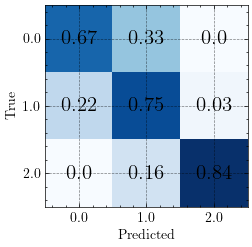

In [9]:
y_pred = predict( test[0], [fiducial_model] )
plot_confusion_matrix( test[1], y_pred)

#### 2. Get the fiducial for total and stellar for CDM fiducial, hi and low and DM (all_cdm_plus_dm )

In [10]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar'], 
                                                      allDataFile='pickles/binned_data_20.pkl')

checkpoint_filepath = 'models/test_baryon/%s_cdmall_0p1_1_tot_ste_%i' % (model_name, random_state)


all_cdm_plus_dm = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)



/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (4800, 100, 100, 2) (2 channels).
  warnings.warn(


Epoch 1/50
150/150 [==============================] - ETA: 0s - loss: 1.4553 - accuracy: 0.3246

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 22s 139ms/step - loss: 1.4553 - accuracy: 0.3246 - val_loss: 1.3464 - val_accuracy: 0.3867
Epoch 2/50
150/150 [==============================] - ETA: 0s - loss: 1.2932 - accuracy: 0.4042

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 22s 148ms/step - loss: 1.2932 - accuracy: 0.4042 - val_loss: 1.2721 - val_accuracy: 0.4250
Epoch 3/50
150/150 [==============================] - ETA: 0s - loss: 1.2215 - accuracy: 0.4258

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 21s 140ms/step - loss: 1.2215 - accuracy: 0.4258 - val_loss: 1.2042 - val_accuracy: 0.4417
Epoch 4/50
150/150 [==============================] - ETA: 0s - loss: 1.1870 - accuracy: 0.4423

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 20s 135ms/step - loss: 1.1870 - accuracy: 0.4423 - val_loss: 1.1916 - val_accuracy: 0.4525
Epoch 5/50
150/150 [==============================] - 17s 113ms/step - loss: 1.1761 - accuracy: 0.4519 - val_loss: 1.1951 - val_accuracy: 0.4417
Epoch 6/50
150/150 [==============================] - ETA: 0s - loss: 1.1669 - accuracy: 0.4563

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 16s 108ms/step - loss: 1.1669 - accuracy: 0.4563 - val_loss: 1.1666 - val_accuracy: 0.4575
Epoch 7/50
150/150 [==============================] - ETA: 0s - loss: 1.1504 - accuracy: 0.4654

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 21s 142ms/step - loss: 1.1504 - accuracy: 0.4654 - val_loss: 1.1665 - val_accuracy: 0.4583
Epoch 8/50
150/150 [==============================] - ETA: 0s - loss: 1.1486 - accuracy: 0.4625

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 20s 136ms/step - loss: 1.1486 - accuracy: 0.4625 - val_loss: 1.1549 - val_accuracy: 0.4658
Epoch 9/50
150/150 [==============================] - 20s 132ms/step - loss: 1.1365 - accuracy: 0.4635 - val_loss: 1.1880 - val_accuracy: 0.4617
Epoch 10/50
150/150 [==============================] - 20s 133ms/step - loss: 1.1255 - accuracy: 0.4731 - val_loss: 1.1524 - val_accuracy: 0.4558
Epoch 11/50
150/150 [==============================] - ETA: 0s - loss: 1.1186 - accuracy: 0.4725

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 21s 143ms/step - loss: 1.1186 - accuracy: 0.4725 - val_loss: 1.1608 - val_accuracy: 0.4683
Epoch 12/50
150/150 [==============================] - ETA: 0s - loss: 1.1226 - accuracy: 0.4638

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 22s 150ms/step - loss: 1.1226 - accuracy: 0.4638 - val_loss: 1.1138 - val_accuracy: 0.4892
Epoch 13/50
150/150 [==============================] - 20s 134ms/step - loss: 1.1210 - accuracy: 0.4744 - val_loss: 1.1327 - val_accuracy: 0.4808
Epoch 14/50
150/150 [==============================] - 19s 130ms/step - loss: 1.1061 - accuracy: 0.4860 - val_loss: 1.1270 - val_accuracy: 0.4658
Epoch 15/50
150/150 [==============================] - 18s 122ms/step - loss: 1.1024 - accuracy: 0.4881 - val_loss: 1.1118 - val_accuracy: 0.4800
Epoch 16/50
150/150 [==============================] - 19s 124ms/step - loss: 1.0982 - accuracy: 0.4917 - val_loss: 1.1194 - val_accuracy: 0.4783
Epoch 17/50
150/150 [==============================] - 19s 125ms/step - loss: 1.0891 - accuracy: 0.4913 - val_loss: 1.0941 - val_accuracy: 0.4850
Epoch 18/50
150/150 [==============================] - 20s 133ms/step - loss: 1.0915 - accuracy: 0.4867 - val_loss: 1.1012 - val_accurac

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 21s 139ms/step - loss: 1.0812 - accuracy: 0.4994 - val_loss: 1.0960 - val_accuracy: 0.5000
Epoch 22/50
150/150 [==============================] - 19s 125ms/step - loss: 1.0871 - accuracy: 0.4977 - val_loss: 1.0975 - val_accuracy: 0.4842
Epoch 23/50
150/150 [==============================] - ETA: 0s - loss: 1.0760 - accuracy: 0.5079

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 22s 149ms/step - loss: 1.0760 - accuracy: 0.5079 - val_loss: 1.0774 - val_accuracy: 0.5050
Epoch 24/50
150/150 [==============================] - 19s 128ms/step - loss: 1.0785 - accuracy: 0.4977 - val_loss: 1.0952 - val_accuracy: 0.4958
Epoch 25/50
150/150 [==============================] - 20s 132ms/step - loss: 1.0705 - accuracy: 0.4992 - val_loss: 1.0983 - val_accuracy: 0.4917
Epoch 26/50
150/150 [==============================] - 19s 125ms/step - loss: 1.0607 - accuracy: 0.5081 - val_loss: 1.1214 - val_accuracy: 0.4800
Epoch 27/50
150/150 [==============================] - 19s 126ms/step - loss: 1.0632 - accuracy: 0.5050 - val_loss: 1.0982 - val_accuracy: 0.4908
Epoch 28/50
150/150 [==============================] - 19s 129ms/step - loss: 1.0631 - accuracy: 0.5075 - val_loss: 1.0922 - val_accuracy: 0.5033
Epoch 29/50
150/150 [==============================] - 15s 100ms/step - loss: 1.0535 - accuracy: 0.5133 - val_loss: 1.1104 - val_accurac

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 21s 142ms/step - loss: 1.0524 - accuracy: 0.5194 - val_loss: 1.0687 - val_accuracy: 0.5092
Epoch 32/50
150/150 [==============================] - 18s 122ms/step - loss: 1.0493 - accuracy: 0.5179 - val_loss: 1.0730 - val_accuracy: 0.4992
Epoch 33/50
150/150 [==============================] - 19s 128ms/step - loss: 1.0444 - accuracy: 0.5188 - val_loss: 1.0635 - val_accuracy: 0.4917
Epoch 34/50
150/150 [==============================] - 20s 131ms/step - loss: 1.0389 - accuracy: 0.5240 - val_loss: 1.1004 - val_accuracy: 0.4917
Epoch 35/50
150/150 [==============================] - 20s 131ms/step - loss: 1.0407 - accuracy: 0.5217 - val_loss: 1.0643 - val_accuracy: 0.5092
Epoch 36/50
150/150 [==============================] - 19s 128ms/step - loss: 1.0263 - accuracy: 0.5306 - val_loss: 1.0989 - val_accuracy: 0.4800
Epoch 37/50
150/150 [==============================] - 20s 136ms/step - loss: 1.0442 - accuracy: 0.5221 - val_loss: 1.0750 - val_accurac

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_42/assets


150/150 [==============================] - 20s 136ms/step - loss: 1.0100 - accuracy: 0.5404 - val_loss: 1.0508 - val_accuracy: 0.5217
Epoch 47/50
150/150 [==============================] - 20s 132ms/step - loss: 1.0021 - accuracy: 0.5477 - val_loss: 1.0761 - val_accuracy: 0.4850
Epoch 48/50
150/150 [==============================] - 19s 124ms/step - loss: 0.9958 - accuracy: 0.5523 - val_loss: 1.0656 - val_accuracy: 0.5033
Epoch 49/50
150/150 [==============================] - 19s 125ms/step - loss: 1.0018 - accuracy: 0.5377 - val_loss: 1.0523 - val_accuracy: 0.5033
Epoch 50/50
150/150 [==============================] - 21s 139ms/step - loss: 0.9880 - accuracy: 0.5554 - val_loss: 1.0503 - val_accuracy: 0.5117


#### 3. Get the fiducial for total, xray and stellar for CDM and low fiducial and DM (all_cdm_plus_dm_3_channel)

In [11]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl')

checkpoint_filepath = 'models/test_baryon/%s_cdmall_0p1_1_tot_ste_xray_%i' % (model_name, random_state)


all_cdm_plus_dm_3_channels = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)





Epoch 1/50
150/150 [==============================] - ETA: 0s - loss: 1.4572 - accuracy: 0.3683

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 27s 178ms/step - loss: 1.4572 - accuracy: 0.3683 - val_loss: 1.3379 - val_accuracy: 0.4358
Epoch 2/50
150/150 [==============================] - ETA: 0s - loss: 1.2706 - accuracy: 0.4646

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 24s 161ms/step - loss: 1.2706 - accuracy: 0.4646 - val_loss: 1.2461 - val_accuracy: 0.4800
Epoch 3/50
150/150 [==============================] - ETA: 0s - loss: 1.1688 - accuracy: 0.5175

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 23s 154ms/step - loss: 1.1688 - accuracy: 0.5175 - val_loss: 1.1265 - val_accuracy: 0.5292
Epoch 4/50
150/150 [==============================] - ETA: 0s - loss: 1.1040 - accuracy: 0.5494

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 27s 183ms/step - loss: 1.1040 - accuracy: 0.5494 - val_loss: 1.0651 - val_accuracy: 0.5542
Epoch 5/50
150/150 [==============================] - 25s 167ms/step - loss: 1.0303 - accuracy: 0.5656 - val_loss: 1.0700 - val_accuracy: 0.5250
Epoch 6/50
150/150 [==============================] - ETA: 0s - loss: 1.0105 - accuracy: 0.5802

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 26s 171ms/step - loss: 1.0105 - accuracy: 0.5802 - val_loss: 1.0465 - val_accuracy: 0.5658
Epoch 7/50
150/150 [==============================] - ETA: 0s - loss: 0.9847 - accuracy: 0.5877

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 27s 178ms/step - loss: 0.9847 - accuracy: 0.5877 - val_loss: 0.9671 - val_accuracy: 0.6067
Epoch 8/50
150/150 [==============================] - 25s 168ms/step - loss: 0.9566 - accuracy: 0.6015 - val_loss: 0.9728 - val_accuracy: 0.5933
Epoch 9/50
150/150 [==============================] - 24s 161ms/step - loss: 0.9342 - accuracy: 0.6106 - val_loss: 0.9738 - val_accuracy: 0.5992
Epoch 10/50
150/150 [==============================] - 26s 172ms/step - loss: 0.9201 - accuracy: 0.6152 - val_loss: 0.9415 - val_accuracy: 0.6008
Epoch 11/50
150/150 [==============================] - 24s 160ms/step - loss: 0.9099 - accuracy: 0.6217 - val_loss: 1.0833 - val_accuracy: 0.5567
Epoch 12/50
150/150 [==============================] - 24s 163ms/step - loss: 0.9048 - accuracy: 0.6208 - val_loss: 1.0046 - val_accuracy: 0.6008
Epoch 13/50
150/150 [==============================] - 24s 161ms/step - loss: 0.8975 - accuracy: 0.6319 - val_loss: 0.9262 - val_accuracy:

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 169ms/step - loss: 0.8785 - accuracy: 0.6298 - val_loss: 0.9260 - val_accuracy: 0.6125
Epoch 15/50
150/150 [==============================] - ETA: 0s - loss: 0.8706 - accuracy: 0.6377

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 26s 176ms/step - loss: 0.8706 - accuracy: 0.6377 - val_loss: 0.9129 - val_accuracy: 0.6217
Epoch 16/50
150/150 [==============================] - 24s 163ms/step - loss: 0.8627 - accuracy: 0.6388 - val_loss: 0.9458 - val_accuracy: 0.6017
Epoch 17/50
150/150 [==============================] - 24s 160ms/step - loss: 0.8464 - accuracy: 0.6494 - val_loss: 0.9228 - val_accuracy: 0.6100
Epoch 18/50
150/150 [==============================] - 24s 160ms/step - loss: 0.8501 - accuracy: 0.6446 - val_loss: 0.9468 - val_accuracy: 0.6033
Epoch 19/50
150/150 [==============================] - ETA: 0s - loss: 0.8544 - accuracy: 0.6492

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 166ms/step - loss: 0.8544 - accuracy: 0.6492 - val_loss: 0.9004 - val_accuracy: 0.6275
Epoch 20/50
150/150 [==============================] - ETA: 0s - loss: 0.8363 - accuracy: 0.6458

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 25s 170ms/step - loss: 0.8363 - accuracy: 0.6458 - val_loss: 0.8934 - val_accuracy: 0.6375
Epoch 21/50
150/150 [==============================] - 24s 161ms/step - loss: 0.8219 - accuracy: 0.6581 - val_loss: 0.8929 - val_accuracy: 0.6258
Epoch 22/50
150/150 [==============================] - 25s 163ms/step - loss: 0.8318 - accuracy: 0.6571 - val_loss: 0.9057 - val_accuracy: 0.6150
Epoch 23/50
150/150 [==============================] - 24s 162ms/step - loss: 0.7997 - accuracy: 0.6650 - val_loss: 0.9292 - val_accuracy: 0.6292
Epoch 24/50
150/150 [==============================] - 25s 165ms/step - loss: 0.8295 - accuracy: 0.6579 - val_loss: 0.8918 - val_accuracy: 0.6325
Epoch 25/50
150/150 [==============================] - ETA: 0s - loss: 0.7887 - accuracy: 0.6767

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 23s 151ms/step - loss: 0.7887 - accuracy: 0.6767 - val_loss: 0.8764 - val_accuracy: 0.6408
Epoch 26/50
150/150 [==============================] - 24s 157ms/step - loss: 0.7963 - accuracy: 0.6660 - val_loss: 0.9224 - val_accuracy: 0.6367
Epoch 27/50
150/150 [==============================] - 19s 123ms/step - loss: 0.7955 - accuracy: 0.6650 - val_loss: 0.9475 - val_accuracy: 0.6058
Epoch 28/50
150/150 [==============================] - 24s 160ms/step - loss: 0.8022 - accuracy: 0.6650 - val_loss: 0.8981 - val_accuracy: 0.6292
Epoch 29/50
150/150 [==============================] - 21s 140ms/step - loss: 0.7778 - accuracy: 0.6737 - val_loss: 0.9733 - val_accuracy: 0.6317
Epoch 30/50
150/150 [==============================] - 22s 146ms/step - loss: 0.7889 - accuracy: 0.6715 - val_loss: 0.9827 - val_accuracy: 0.5892
Epoch 31/50
150/150 [==============================] - 23s 152ms/step - loss: 0.7722 - accuracy: 0.6779 - val_loss: 0.9044 - val_accurac

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmall_0p1_1_tot_ste_xray_42/assets


150/150 [==============================] - 21s 142ms/step - loss: 0.7714 - accuracy: 0.6735 - val_loss: 0.8639 - val_accuracy: 0.6508
Epoch 35/50
150/150 [==============================] - 23s 155ms/step - loss: 0.7485 - accuracy: 0.6815 - val_loss: 0.8720 - val_accuracy: 0.6383
Epoch 36/50
150/150 [==============================] - 23s 156ms/step - loss: 0.7376 - accuracy: 0.6925 - val_loss: 0.9158 - val_accuracy: 0.6367
Epoch 37/50
150/150 [==============================] - 24s 162ms/step - loss: 0.7373 - accuracy: 0.6898 - val_loss: 0.8977 - val_accuracy: 0.6250
Epoch 38/50
150/150 [==============================] - 20s 131ms/step - loss: 0.7594 - accuracy: 0.6792 - val_loss: 0.9204 - val_accuracy: 0.6225
Epoch 39/50
150/150 [==============================] - 24s 159ms/step - loss: 0.7343 - accuracy: 0.6988 - val_loss: 0.8797 - val_accuracy: 0.6492
Epoch 40/50
150/150 [==============================] - 24s 161ms/step - loss: 0.7404 - accuracy: 0.6981 - val_loss: 0.9335 - val_accurac

#### 4. Get the fiducial for total, xray and stellar for CDM and low fiducial (all_cdm_3_channel)

In [29]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl')

checkpoint_filepath = 'models/test_baryon/%s_cdmfid_0p1_1_tot_ste_xray_%i' % (model_name, random_state)


fid_cdm_3_channel = get_best_model( train, test, model_name=model_name, checkpoint_filepath=checkpoint_filepath)





Epoch 1/50
90/90 [==============================] - ETA: 0s - loss: 0.9580 - accuracy: 0.5226

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 13s 134ms/step - loss: 0.9580 - accuracy: 0.5226 - val_loss: 0.8595 - val_accuracy: 0.5653
Epoch 2/50
90/90 [==============================] - ETA: 0s - loss: 0.8483 - accuracy: 0.5698

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 135ms/step - loss: 0.8483 - accuracy: 0.5698 - val_loss: 0.7955 - val_accuracy: 0.6264
Epoch 3/50
90/90 [==============================] - ETA: 0s - loss: 0.7961 - accuracy: 0.6149

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 134ms/step - loss: 0.7961 - accuracy: 0.6149 - val_loss: 0.7412 - val_accuracy: 0.6431
Epoch 4/50
90/90 [==============================] - ETA: 0s - loss: 0.7239 - accuracy: 0.6472

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 13s 143ms/step - loss: 0.7239 - accuracy: 0.6472 - val_loss: 0.6853 - val_accuracy: 0.6583
Epoch 5/50
90/90 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.6868

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 139ms/step - loss: 0.6621 - accuracy: 0.6868 - val_loss: 0.6449 - val_accuracy: 0.6972
Epoch 6/50
90/90 [==============================] - 12s 128ms/step - loss: 0.6421 - accuracy: 0.6948 - val_loss: 0.7402 - val_accuracy: 0.6333
Epoch 7/50
90/90 [==============================] - ETA: 0s - loss: 0.6211 - accuracy: 0.7104

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 135ms/step - loss: 0.6211 - accuracy: 0.7104 - val_loss: 0.5895 - val_accuracy: 0.7222
Epoch 8/50
90/90 [==============================] - 11s 122ms/step - loss: 0.6111 - accuracy: 0.7083 - val_loss: 0.6245 - val_accuracy: 0.7111
Epoch 9/50
90/90 [==============================] - 11s 122ms/step - loss: 0.5957 - accuracy: 0.7174 - val_loss: 0.5776 - val_accuracy: 0.7208
Epoch 10/50
90/90 [==============================] - 11s 124ms/step - loss: 0.5899 - accuracy: 0.7257 - val_loss: 0.5738 - val_accuracy: 0.7167
Epoch 11/50
90/90 [==============================] - 11s 122ms/step - loss: 0.5686 - accuracy: 0.7312 - val_loss: 0.6078 - val_accuracy: 0.7042
Epoch 12/50
90/90 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7319

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 136ms/step - loss: 0.5719 - accuracy: 0.7319 - val_loss: 0.5710 - val_accuracy: 0.7264
Epoch 13/50
90/90 [==============================] - 12s 128ms/step - loss: 0.5614 - accuracy: 0.7389 - val_loss: 0.5924 - val_accuracy: 0.7250
Epoch 14/50
90/90 [==============================] - ETA: 0s - loss: 0.5545 - accuracy: 0.7302

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 138ms/step - loss: 0.5545 - accuracy: 0.7302 - val_loss: 0.5491 - val_accuracy: 0.7347
Epoch 15/50
90/90 [==============================] - ETA: 0s - loss: 0.5474 - accuracy: 0.7389

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 138ms/step - loss: 0.5474 - accuracy: 0.7389 - val_loss: 0.5528 - val_accuracy: 0.7361
Epoch 16/50
90/90 [==============================] - ETA: 0s - loss: 0.5510 - accuracy: 0.7375

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 136ms/step - loss: 0.5510 - accuracy: 0.7375 - val_loss: 0.5396 - val_accuracy: 0.7389
Epoch 17/50
90/90 [==============================] - ETA: 0s - loss: 0.5476 - accuracy: 0.7444

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 138ms/step - loss: 0.5476 - accuracy: 0.7444 - val_loss: 0.5441 - val_accuracy: 0.7472
Epoch 18/50
90/90 [==============================] - ETA: 0s - loss: 0.5415 - accuracy: 0.7517

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 136ms/step - loss: 0.5415 - accuracy: 0.7517 - val_loss: 0.5302 - val_accuracy: 0.7542
Epoch 19/50
90/90 [==============================] - 11s 125ms/step - loss: 0.5364 - accuracy: 0.7389 - val_loss: 0.5657 - val_accuracy: 0.7278
Epoch 20/50
90/90 [==============================] - 11s 123ms/step - loss: 0.5302 - accuracy: 0.7486 - val_loss: 0.5463 - val_accuracy: 0.7264
Epoch 21/50
90/90 [==============================] - 11s 124ms/step - loss: 0.5271 - accuracy: 0.7590 - val_loss: 0.5475 - val_accuracy: 0.7278
Epoch 22/50
90/90 [==============================] - 11s 123ms/step - loss: 0.5305 - accuracy: 0.7507 - val_loss: 0.5465 - val_accuracy: 0.7194
Epoch 23/50
90/90 [==============================] - 11s 124ms/step - loss: 0.5197 - accuracy: 0.7542 - val_loss: 0.5499 - val_accuracy: 0.7292
Epoch 24/50
90/90 [==============================] - 11s 125ms/step - loss: 0.5198 - accuracy: 0.7573 - val_loss: 0.5413 - val_accuracy: 0.7403
Epoc

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 13s 140ms/step - loss: 0.4799 - accuracy: 0.7747 - val_loss: 0.5094 - val_accuracy: 0.7597
Epoch 34/50
90/90 [==============================] - 11s 124ms/step - loss: 0.4918 - accuracy: 0.7677 - val_loss: 0.5675 - val_accuracy: 0.7306
Epoch 35/50
90/90 [==============================] - 11s 125ms/step - loss: 0.4873 - accuracy: 0.7705 - val_loss: 0.5460 - val_accuracy: 0.7444
Epoch 36/50
90/90 [==============================] - ETA: 0s - loss: 0.4840 - accuracy: 0.7726

INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


INFO:tensorflow:Assets written to: models/test_baryon/simple_cdmfid_0p1_1_tot_ste_xray_42/assets


90/90 [==============================] - 12s 135ms/step - loss: 0.4840 - accuracy: 0.7726 - val_loss: 0.5051 - val_accuracy: 0.7639
Epoch 37/50
90/90 [==============================] - 11s 123ms/step - loss: 0.4675 - accuracy: 0.7844 - val_loss: 0.5261 - val_accuracy: 0.7569
Epoch 38/50
90/90 [==============================] - 11s 125ms/step - loss: 0.4695 - accuracy: 0.7826 - val_loss: 0.5209 - val_accuracy: 0.7472
Epoch 39/50
90/90 [==============================] - 11s 127ms/step - loss: 0.4823 - accuracy: 0.7729 - val_loss: 0.5174 - val_accuracy: 0.7542
Epoch 40/50
90/90 [==============================] - 11s 125ms/step - loss: 0.4722 - accuracy: 0.7806 - val_loss: 0.5032 - val_accuracy: 0.7528
Epoch 41/50
90/90 [==============================] - 11s 124ms/step - loss: 0.4655 - accuracy: 0.7840 - val_loss: 0.5309 - val_accuracy: 0.7569
Epoch 42/50
90/90 [==============================] - 11s 125ms/step - loss: 0.4856 - accuracy: 0.7760 - val_loss: 0.5105 - val_accuracy: 0.7542
Epoc

#### 5. Get the fiducial for xray only for CDM and low and high (all_cdm_xray_only)

In [13]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi'], 
                                                      channels=['xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl')
num_classes = len(np.unique(test[1]))
all_cdm_xray_only = simpleCNN.getModel_ds(num_classes)
history = all_cdm_xray_only.fit(
  x=train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/80
90/90 [==============================] - 7s 75ms/step - loss: 0.9764 - accuracy: 0.5191 - val_loss: 0.9490 - val_accuracy: 0.5458
Epoch 2/80
90/90 [==============================] - 7s 74ms/step - loss: 0.8957 - accuracy: 0.5774 - val_loss: 0.8856 - val_accuracy: 0.6000
Epoch 3/80
90/90 [==============================] - 7s 73ms/step - loss: 0.8503 - accuracy: 0.6010 - val_loss: 0.9318 - val_accuracy: 0.5403
Epoch 4/80
90/90 [==============================] - 7s 74ms/step - loss: 0.8139 - accuracy: 0.6264 - val_loss: 0.9170 - val_accuracy: 0.5833
Epoch 5/80
90/90 [==============================] - 6s 69ms/step - loss: 0.7973 - accuracy: 0.6212 - val_loss: 0.8051 - val_accuracy: 0.6208
Epoch 6/80
90/90 [==============================] - 6s 71ms/step - loss: 0.7929 - accuracy: 0.6285 - val_loss: 0.8030 - val_accuracy: 0.6194
Epoch 7/80
90/90 [==============================] - 6s 70ms/step - loss: 0.7815 - accuracy: 0.6292 - val_loss: 0.8257 - val_accuracy: 0.6097
Epoch 8/80
90

/Users/davidharvey/Work/darkCNN/examples/tools.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/Users/davidharvey/Work/darkCNN/examples/tools.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


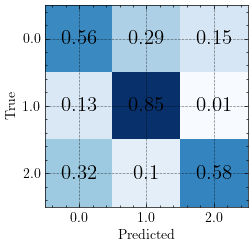

In [14]:
y_pred = predict( test[0], [all_cdm_xray_only] )
plot_confusion_matrix( test[1], y_pred)

### Plot the results

In [30]:
models = [ fiducial_model, fid_cdm_3_channel, all_cdm_plus_dm, all_cdm_plus_dm_3_channels ]


In [31]:
histories = [ i.history.history for i in models ]


In [32]:
pkl.dump(histories, open("pickles/test_baryon.pkl","wb"))

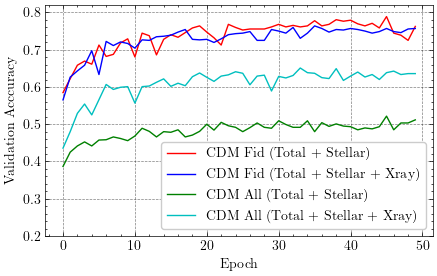

In [33]:
#models = [ model,  two_channel_model, two_channel_xr_model, three_channel_model, correlation_model, correlation_model_w_stellar]
plt.figure(figsize=(5,3))
plt.xlabel('Epoch')
plt.ylabel('Validation Acccuracy')
histories = pkl.load(open("pickles/test_baryon.pkl","rb"))
c = ['r','b','g','c']
names = ['CDM Fid (Total + Stellar)', 'CDM Fid (Total + Stellar + Xray)', \
         'CDM All (Total + Stellar)', 'CDM All (Total + Stellar + Xray)']
for i, iModel in enumerate(histories):
    plt.plot(np.arange(len(iModel['val_accuracy'])), iModel['val_accuracy'], label=names[i], c=c[i])
    #plt.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])
    #print(np.max(iModel.history.history['val_accuracy']))

plt.legend(loc=4)
plt.ylim(0.2,0.82)
plt.savefig("../plots/baryons_test.pdf")

### Plot the confusion matrices

In [35]:
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar'], 
                                                      allDataFile='pickles/binned_data_20.pkl')
y_pred = predict( test[0], [all_cdm_plus_dm] )


/Users/davidharvey/Work/darkCNN/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (4800, 100, 100, 2) (2 channels).
  warnings.warn(


In [36]:
train_three_channel, test_three_chanel = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl')
y_pred_three_channel = predict( test_three_chanel[0], [all_cdm_plus_dm_3_channels] )


/Users/davidharvey/Work/darkCNN/examples/tools.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/Users/davidharvey/Work/darkCNN/examples/tools.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)
/Users/davidharvey/Work/darkCNN/examples/tools.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/Users/davidharvey/Work/darkCNN/examples/tools.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


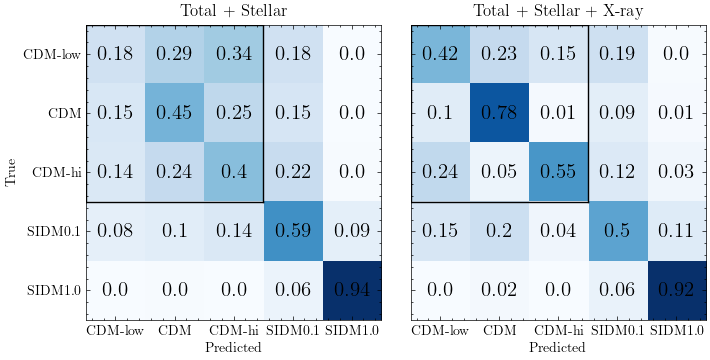

In [42]:
fig, axarr = plt.subplots( 1,2, figsize=(8,5))
fig.subplots_adjust(wspace=0.1)
plot_confusion_matrix( test[1], y_pred, labels=['CDM-low','CDM','CDM-hi','SIDM0.1','SIDM1.0'], 
                      ax=axarr[0], cbar=False)
plot_confusion_matrix( test_three_chanel[1], y_pred_three_channel, 
                      labels=['CDM-low','CDM','CDM-hi','SIDM0.1','SIDM1.0'],
                      ax=axarr[1], ylabel=False, cbar=False )
title = axarr[0].set_title('Total + Stellar')
title = axarr[1].set_title('Total + Stellar + X-ray')
for i in axarr:
    #i.fill_between([-0.5,2.5],[-0.5,-0.5],[2.5,2.5],color='grey',alpha=0.2)
    i.plot([-0.5,2.5],[-0.5,-0.5],'k-')
    i.plot([-0.5,2.5],[2.5,2.5],'k-')
    i.plot([-0.5,-0.5],[-0.5,2.5],'k-')
    i.plot([2.5,2.5],[-0.5,2.5],'k-')
plt.savefig("../plots/baryonic_confusion.pdf")

In [29]:

epochs = 80
train, test = getGenerators(augment_data=True, simulationNames=['CDM_low','CDM','CDM_hi'], 
                                                      channels=['xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl', data_labels=[0,1,2])
num_classes = len(np.unique(test[1]))
all_cdm_xray_only = simpleCNN.getModel_ds(num_classes)
history = all_cdm_xray_only.fit(
  x=train,
  validation_data=test,
  epochs=epochs
)

Epoch 1/80
90/90 [==============================] - 7s 75ms/step - loss: 0.9981 - accuracy: 0.4927 - val_loss: 0.9713 - val_accuracy: 0.5125
Epoch 2/80
90/90 [==============================] - 6s 71ms/step - loss: 0.8976 - accuracy: 0.5705 - val_loss: 0.8900 - val_accuracy: 0.5583
Epoch 3/80
90/90 [==============================] - 6s 64ms/step - loss: 0.8151 - accuracy: 0.6087 - val_loss: 0.8290 - val_accuracy: 0.6194
Epoch 4/80
90/90 [==============================] - 7s 72ms/step - loss: 0.7760 - accuracy: 0.6396 - val_loss: 0.7915 - val_accuracy: 0.6361
Epoch 5/80
90/90 [==============================] - 6s 71ms/step - loss: 0.7581 - accuracy: 0.6493 - val_loss: 0.7805 - val_accuracy: 0.6444
Epoch 6/80
90/90 [==============================] - 6s 64ms/step - loss: 0.7524 - accuracy: 0.6559 - val_loss: 0.7562 - val_accuracy: 0.6556
Epoch 7/80
90/90 [==============================] - 6s 65ms/step - loss: 0.7471 - accuracy: 0.6712 - val_loss: 0.7863 - val_accuracy: 0.6389
Epoch 8/80
90

In [27]:
train, test = getGenerators(augment_data=True, simulationNames=['SIDM0.1'], 
                                                      channels=['xray'], 
                                                      allDataFile='pickles/binned_data_20.pkl',train_split=0.01)
predictions = all_cdm_xray_only.predict( test[0] )

38/38 [==============================] - 1s 15ms/step


# After this is experimental - not needed for the paper

#### Combine models 1 + 4

In [ ]:
from simpleCNN_combined_model import getCombinedModel, getModel
from getSIDMdata_double_input import get_tf_DataSet as double_input_data

In [ ]:
input_generator, val_data, steps_per_epoch = double_input_data(augment_data=True, simulationNames=['CDM_low','CDM_hi','CDM','SIDM0.1','SIDM1'], 
                                                      channels=[['total','stellar','xray'],['total','stellar']], 
                                                      allDataFile='pickles/binned_data_20.pkl')
nclasses = len(np.unique(test_data[1]))

In [ ]:
list_of_input_shapes = [ i.shape[1:] for i in val_data[0] ]


In [ ]:
all_baryon_layers = all_cdm_3_channel.layers[0].layers + all_cdm_3_channel.layers[1].layers
all_dm_layers = fiducial_model.layers[0].layers + fiducial_model.layers[1].layers

In [ ]:
list_of_output_shapes = [ all_baryon_layers[-1].output_shape[1:][0], all_dm_layers[-1].output_shape[1:][0] ]

In [ ]:
model = getCombinedModel(list_of_input_shapes, list_of_output_shapes, nclasses)

In [ ]:
for iLayer in range(len(all_baryon_layers)):
    this_layer = (1 + iLayer ) *2

    model.layers[this_layer] =  all_baryon_layers[iLayer]
    model.layers[this_layer].set_weights(  all_baryon_layers[iLayer].get_weights() )
    model.layers[this_layer].trainable = False
    
    
    model.layers[this_layer+1] =  all_dm_layers[iLayer]
    model.layers[this_layer+1].set_weights( all_dm_layers[iLayer].get_weights() )
    model.layers[this_layer+1].trainable = False

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model_history = model.fit( input_generator, validation_data=val_data, epochs=epochs, steps_per_epoch=steps_per_epoch) 

In [ ]:
model_history = model.fit( input_generator, validation_data=val_data, epochs=epochs, steps_per_epoch=steps_per_epoch) 

In [ ]:
y_pred = predict( val_data[0], [model] )
plot_confusion_matrix( val_data[1], y_pred)

In [ ]:
y_pred = predict( test[0], [all_cdm_plus_dm_3_channel] )
plot_confusion_matrix( test[1], y_pred)

### What happens when I get the baryons wrong with no xray (confusion matrices)?

In [ ]:
epochs=100
baryon_models = ['CDM_hi', 'CDM_low','CDM']

all_models = []
all_history = []

for iB_model in baryon_models:

    train_baryons, test_baryons = getGenerators(augment_data=True, simulationNames=[iB_model]+['SIDM0.1'], 
                                                      channels=['total','stellar'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=0.85)
    num_classes = len(np.unique(test_baryons[1]))
    this_model = simpleCNN.getModel_ds(num_classes)
    history = this_model.fit(
      x=train_baryons,
      validation_data=test_baryons,
      epochs=epochs, verbose=0
    )
    all_history.append(history)
    all_models.append(this_model)
    
    for jB, jB_model in enumerate(baryon_models):
        if jB_model == iB_model:
            test = test_baryons
        else:
            train_cdm_hi, test = getGenerators(augment_data=True, simulationNames=[jB_model]+['SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=0.01) 
        
        y_pred = predict( test[0], [this_model])
        plot_confusion_matrix( test[1], y_pred, title='Trained on %s - tested on %s' % (iB_model, jB_model))

In [ ]:
for i in all_history:
    plt.plot(i.history['val_accuracy'])

### What happens when I get the baryons wrong with xray?

In [ ]:
epochs=100
baryon_models = ['CDM_hi', 'CDM_low','CDM']

all_models = []
all_history = []

for iB_model in baryon_models:

    train_baryons, test_baryons = getGenerators(augment_data=True, simulationNames=[iB_model]+['SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                        allDataFile='pickles/binned_data_20.pkl')
    num_classes = len(np.unique(test[1]))
    this_model = simpleCNN.getModel_ds(num_classes)
    history = this_model.fit(
      x=train_baryons,
      validation_data=test_baryons,
      epochs=epochs, verbose=0
    )
    all_history.append(history)
    all_models.append(this_model)
    
    for jB, jB_model in enumerate(baryon_models):
        if jB_model == iB_model:
            test = test_baryons
        else:
            train_cdm_hi, test = getGenerators(augment_data=True, simulationNames=[jB_model]+['SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=0.01) 
        
        y_pred = predict( test[0], [this_model])
        plot_confusion_matrix( test[1], y_pred, title='Trained on %s - tested on %s' % (iB_model, jB_model))

### What happens if i train on CDM_X + DM and the Universe is CDM_Y? Evaluate CDM_Y to a matrix.

In [ ]:
sum(predict( test[0], [all_models[iB]] ) == 0)

In [ ]:
baryon_models = ['CDM_hi', 'CDM_low','CDM']
evaluation = np.zeros((len(baryon_models),len(baryon_models)))
for iB, iB_model in enumerate(baryon_models):
    for jB, jB_model in enumerate(baryon_models):
        if jB_model == iB_model:
            val_split = 0.85 # Because i cant use the same information in the test than in the train.
        else:
            val_split = 0.01

        train_cdm_hi, test = getGenerators(augment_data=True, simulationNames=[jB_model], 
                                                      channels=['total','stellar'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=val_split) 
    
            
            
        evaluation[iB, jB] = sum(predict( test[0], [all_models[iB]] )==0)/len(test[0])

In [ ]:
ax = plt.gca()
im = ax.imshow(evaluation, origin='lower')
ax.set_xticks( np.arange(len(baryon_models)))
ax.set_yticks( np.arange(len(baryon_models)))

ax.set_xticklabels(baryon_models)
ax.set_yticklabels(baryon_models)
plt.ylabel('Trained', size = 20)
plt.xlabel('Tested', size = 20)
for i in range(len(evaluation)):
    for j in range(len(evaluation)):
        plt.annotate(round(evaluation[i,j],2),xy=\
                    (j,i),horizontalalignment='center',verticalalignment='center',size=15,color='black')
plt.colorbar(im)

### What happens if i train on CDM_BARYONS_X + DM and the Universe is DM+BARYONS_Y? Evaluate CDM_Y to a matrix.

In [ ]:
baryon_models = ['CDM_hi', 'CDM_low','CDM']
dm_evaluation = np.zeros((len(baryon_models),len(baryon_models)))
for iB, iB_model in enumerate(baryon_models):
    
        train_cdm_hi, test = getGenerators(augment_data=True, simulationNames=['SIDM0.1'], 
                                                      channels=['total','stellar'], 
                                                        allDataFile='pickles/binned_data_20.pkl', train_split=0.01) 
    
            
            
        dm_evaluation[iB, 0] = sum(predict( test[0], [all_models[iB]] )==1)/len(test[0])


In [ ]:
ax = plt.gca()
im = ax.imshow(dm_evaluation, origin='lower')
ax.set_xticks( np.arange(len(baryon_models)))
ax.set_yticks( np.arange(len(baryon_models)))

ax.set_xticklabels(baryon_models)
ax.set_yticklabels(baryon_models)
plt.ylabel('Trained', size = 20)
plt.xlabel('Tested', size = 20)
for i in range(len(evaluation)):
    for j in range(len(evaluation)):
        plt.annotate(round(dm_evaluation[i,j],2),xy=\
                    (j,i),horizontalalignment='center',verticalalignment='center',size=15,color='black')
plt.colorbar(im)